# Basic Image Classification with TensorFlow
This notebook demonstrates how to build a basic image classification model using TensorFlow. The model is trained to classify hand-written digits from the MNIST dataset.

In [1]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


In [2]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
x_test shape :  (10000, 28, 28)
y_test shape :  (10000,)


In [3]:
# One-hot encoding the labels
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [4]:
# Reshaping and normalizing the images
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
x_mean, x_std = np.mean(x_train_reshaped), np.std(x_train_reshaped)
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [5]:
# Creating the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Harsha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Training the model
model.fit(x_train_norm, y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8219 - loss: 0.6104
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9417 - loss: 0.1997
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9577 - loss: 0.1446


In [7]:
# Evaluating the model
_ , accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('Accuracy on test set : ', accuracy * 100, '%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9550 - loss: 0.1536
Accuracy on test set :  96.34000062942505 %


In [8]:
# Making predictions on the test set
predictions = model.predict(x_test_norm)
print('predictions shape : ', predictions.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
predictions shape :  (10000, 10)


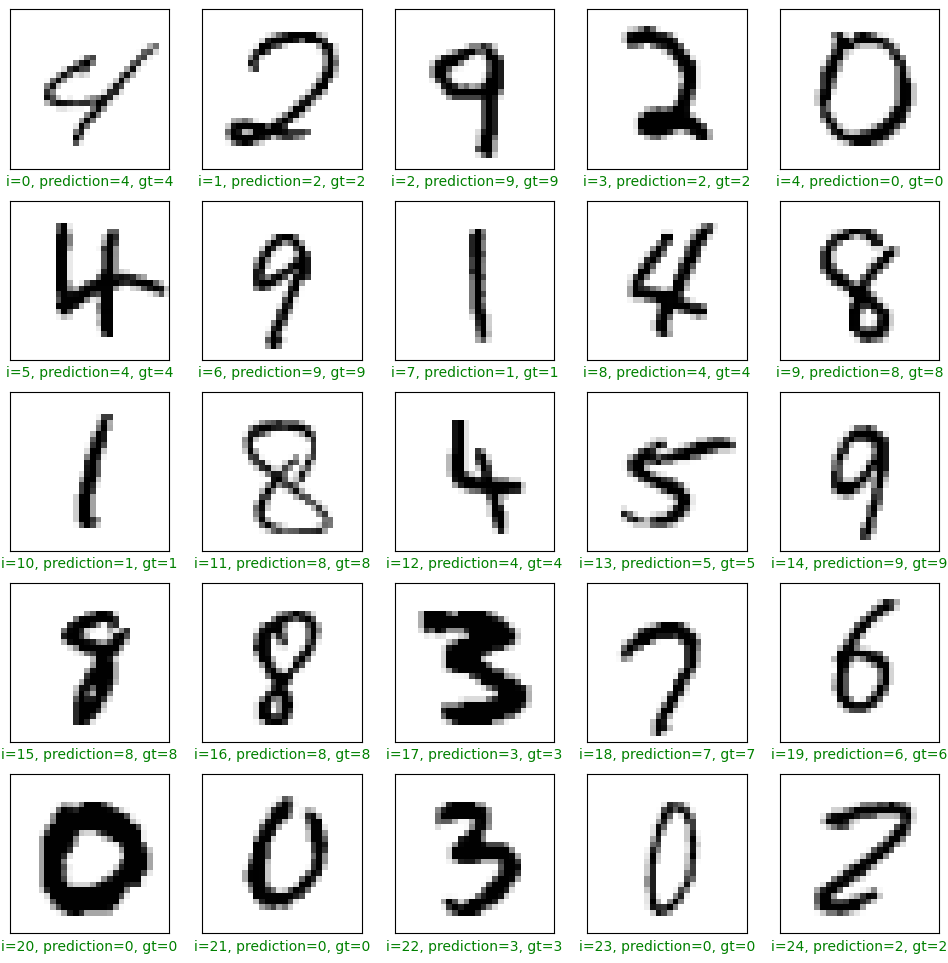

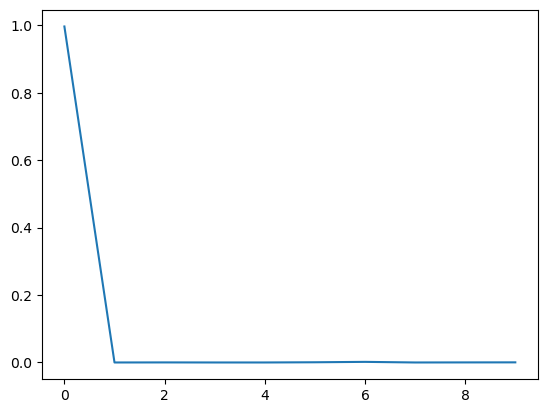

In [9]:
# Plotting the results
plt.figure(figsize=(12, 12))
start = 420
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = np.argmax(predictions[start + i])
    gt = y_test[start + i]
    color = 'g' if prediction == gt else 'r'
    plt.xlabel('i={}, prediction={}, gt={}'.format(i, prediction, gt), color=color)
    plt.imshow(x_test[start + i], cmap='binary')
plt.show()

plt.plot(predictions[424])
plt.show()